In [1]:
import numpy as np
from graspologic.plot import heatmap
import igraph
import matplotlib.pyplot as plt
import random
import itertools
from graspologic.nominate import VNviaSGM 

np.set_printoptions(suppress=True)
!ls

HSfbgraphcore.txt               coremap.rds
HSfbgraphfull.txt               ego.py
HSfrgraphcore.txt               fig6_data.npy
HSfriendsgraphfull.txt          outdated
VNSGM_Testing.ipynb             vertex_nomination_via_SGM.ipynb
VNviaSGM_Proof.ipynb


# Test _get_induced_subgraph

In [2]:
def _get_induced_subgraph(graph_adj_matrix, order, node, mindist=1, verbose=True):
    # Note all nodes are zero based in this implementation, i.e the first node is 0
    dists = [[node]]
    dists_conglom = [node]
    for ii in range(1, order + 1):
        clst = []
        for nn in dists[-1]:
            clst.extend(list(np.where(graph_adj_matrix[nn] >= 1)[0]))
        clst = np.array(list(set(clst)))

        if verbose: 
            print("{} -- {}".format(ii, dists[-1]))
        cn_proc = np.setdiff1d(clst, dists_conglom)

        dists.append(cn_proc)

        dists_conglom.extend(cn_proc)
        dists_conglom = list(set(dists_conglom))
        if verbose: 
            print("dists_conglom ", dists_conglom)

    ress = itertools.chain(*dists[mindist : order + 1])

    return np.array(list(set(ress)))

shuffle inpt =  [23 29 70 25 32 76  9 34 81 24 72 28 79 31 54 74 51  0 27 18 15 50 21 57
 45 59 22 26  5 17 75 58 56 36 52 61 49 63 78 35  4  7 38 47 53 69 33 40
 64 20 19 44 14 68 60 39 46 43  3 48 30 80 73 41 67 77 12 55 65 71  2 66
 10 11 62  6  1  8 37 42 16 13]


<AxesSubplot:title={'center':'Friends Network Shuffled'}>

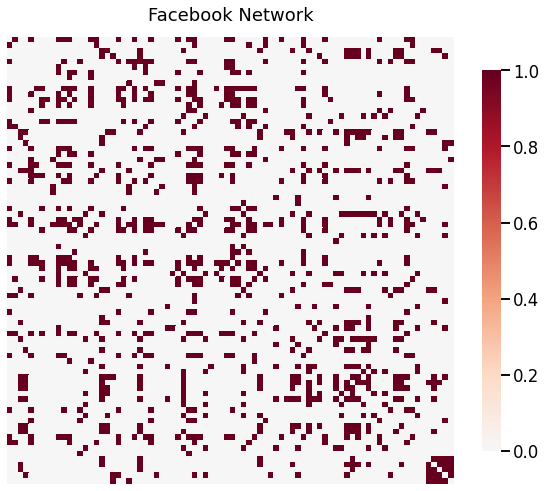

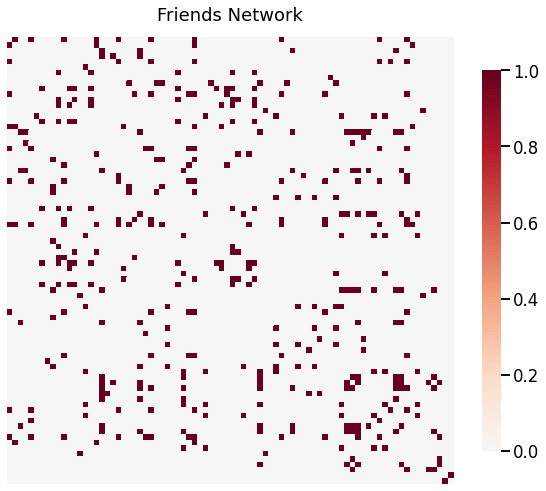

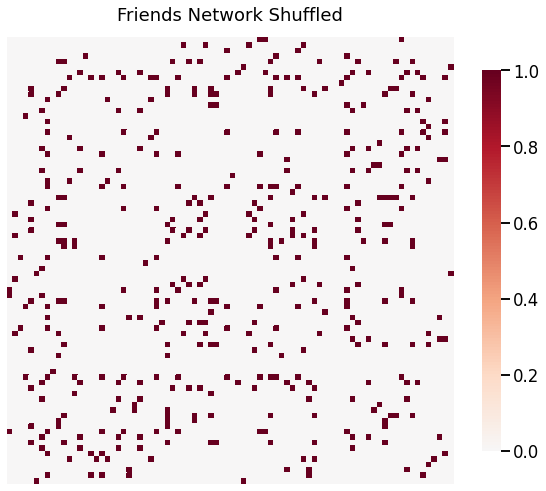

In [4]:
HSfrgraphcore = igraph.load("HSfbgraphcore.txt", format="edges")
HSfrgraphcore.to_undirected()

friends_graph = np.array(HSfrgraphcore.get_adjacency().data)

HSfbgraphcore = igraph.load("HSfrgraphcore.txt", format="edges")
HSfbgraphcore.to_undirected()

facebook_graph = np.array(HSfbgraphcore.get_adjacency().data)

heatmap(friends_graph, title = "Facebook Network")
heatmap(facebook_graph, title = "Friends Network")

node_shuffle_input = np.random.permutation(facebook_graph.shape[0])
print("shuffle inpt = ", node_shuffle_input)
G2 = facebook_graph[np.ix_(node_shuffle_input, node_shuffle_input)]

G1 = friends_graph

heatmap(G2, title = "Friends Network Shuffled")

In [5]:
print("return = ", _get_induced_subgraph(G1, 1, 27))
print("ground truth = ", np.where(G1[27]==1))

print()
print("#"*20)
print()

print("return = ", _get_induced_subgraph(G1, 2, 27))
print("ground truth = ", np.where(G1[27]==1))
print("\t", [(x, np.where(G1[x]==1)) for x in np.where(G1[27]==1)[0]])

print()
print("working perfect!")

print()
print("Shouldnt print any PROBLEM lines")
for ii in _get_induced_subgraph(G1, 2, 27, verbose=False):
    if 27 not in _get_induced_subgraph(G1, 2, ii, verbose=False):
        print("PROBLEM")

1 -- [27]
dists_conglom  [34, 8, 80, 22, 27, 28]
return =  [34  8 80 22 28]
ground truth =  (array([ 8, 22, 28, 34, 80]),)

####################

1 -- [27]
dists_conglom  [34, 8, 80, 22, 27, 28]
2 -- [ 8 22 28 34 80]
dists_conglom  [0, 1, 3, 4, 8, 9, 10, 11, 13, 16, 19, 20, 22, 23, 24, 25, 26, 27, 28, 33, 34, 35, 36, 41, 42, 44, 45, 47, 48, 50, 53, 54, 58, 62, 68, 70, 73, 74, 77, 78, 79, 80, 81]
return =  [ 0  1  3  4  8  9 10 11 13 16 19 20 22 23 24 25 26 28 33 34 35 36 41 42
 44 45 47 48 50 53 54 58 62 68 70 73 74 77 78 79 80 81]
ground truth =  (array([ 8, 22, 28, 34, 80]),)
	 [(8, (array([22, 27, 28, 34]),)), (22, (array([ 4,  8, 24, 27, 28, 34, 47, 81]),)), (28, (array([ 8, 22, 27, 34]),)), (34, (array([ 0,  1,  4,  8,  9, 10, 11, 13, 16, 20, 22, 23, 25, 26, 27, 28, 33,
       35, 41, 42, 44, 45, 47, 48, 50, 54, 58, 68, 70, 73, 74, 80]),)), (80, (array([ 3, 19, 20, 27, 34, 36, 48, 53, 62, 70, 77, 78, 79, 81]),))]

working perfect!

Shouldnt print any PROBLEM lines


# Figure 4 Reproduction

In [6]:
kklst= [(xx, yy) for xx, yy in zip(node_shuffle_input, np.arange(len(node_shuffle_input)))]
kklst.sort(key=lambda x:x[0])
print("Association from (node G1, node G2): ", kklst)
kklst = np.array(kklst)

kklst_dict = {}
for kk in kklst:
    kklst_dict[kk[0]]=kk[1]

Association from (node G1, node G2):  [(0, 17), (1, 76), (2, 70), (3, 58), (4, 40), (5, 28), (6, 75), (7, 41), (8, 77), (9, 6), (10, 72), (11, 73), (12, 66), (13, 81), (14, 52), (15, 20), (16, 80), (17, 29), (18, 19), (19, 50), (20, 49), (21, 22), (22, 26), (23, 0), (24, 9), (25, 3), (26, 27), (27, 18), (28, 11), (29, 1), (30, 60), (31, 13), (32, 4), (33, 46), (34, 7), (35, 39), (36, 33), (37, 78), (38, 42), (39, 55), (40, 47), (41, 63), (42, 79), (43, 57), (44, 51), (45, 24), (46, 56), (47, 43), (48, 59), (49, 36), (50, 21), (51, 16), (52, 34), (53, 44), (54, 14), (55, 67), (56, 32), (57, 23), (58, 31), (59, 25), (60, 54), (61, 35), (62, 74), (63, 37), (64, 48), (65, 68), (66, 71), (67, 64), (68, 53), (69, 45), (70, 2), (71, 69), (72, 10), (73, 62), (74, 15), (75, 30), (76, 5), (77, 65), (78, 38), (79, 12), (80, 61), (81, 8)]


In [13]:
nones = []
ranks = []

for voi in range(G1.shape[0]):
    print("voi {}/{}".format(voi, G1.shape[0]))
    
    g2_vert = kklst_dict[voi]
    
    induced_subgraph = _get_induced_subgraph(G1, 2, voi, verbose=False)
    
    none_res = 0
    rank_list = []
    
    for ii in induced_subgraph:
        sgm = VNviaSGM(order_voi_subgraph = 2, order_seeds_subgraph = 2, n_init = 20)
        preds = sgm.fit_predict(voi, [[ii], [kklst_dict[ii]]], A=G1, B=G2)
        
        if preds is None or len(preds)==0:
            none_res += 1
        else:
            pred_keys = np.array(preds)[:, 0]
            probs = np.array(preds)[:, 1]
#             pred_keys = pred_keys[np.where(probs>0)]
#             pred_keys = [int(xx) for xx in pred_keys]
            if g2_vert in pred_keys:
                rank = np.where(pred_keys==g2_vert)[0]/len(pred_keys)
                rank_list.append(rank)
            else:
                rank_list.append("NA")
    nones.append(none_res)
    ranks.append(rank_list)

voi 0/82
voi 1/82
voi 2/82
voi 3/82
voi 4/82
voi 5/82
voi 6/82
voi 7/82
voi 8/82
voi 9/82
voi 10/82
voi 11/82
voi 12/82
voi 13/82
voi 14/82
voi 15/82
voi 16/82
voi 17/82
voi 18/82
voi 19/82
voi 20/82
voi 21/82
voi 22/82
voi 23/82
voi 24/82
voi 25/82
voi 26/82
voi 27/82
voi 28/82
voi 29/82
voi 30/82
voi 31/82
voi 32/82
voi 33/82
voi 34/82
voi 35/82
voi 36/82
voi 37/82
voi 38/82
voi 39/82
voi 40/82
voi 41/82
voi 42/82
voi 43/82
voi 44/82
voi 45/82
voi 46/82
voi 47/82
voi 48/82
voi 49/82
voi 50/82
voi 51/82
voi 52/82
voi 53/82
voi 54/82
voi 55/82
voi 56/82
voi 57/82
voi 58/82
voi 59/82
voi 60/82
voi 61/82
voi 62/82
voi 63/82
voi 64/82
voi 65/82
voi 66/82
voi 67/82
voi 68/82
voi 69/82
voi 70/82
voi 71/82
voi 72/82
voi 73/82
voi 74/82
voi 75/82
voi 76/82
voi 77/82
voi 78/82
voi 79/82
voi 80/82
voi 81/82


In [14]:
NA = []

CHANCE = []
BETWEEN = []
ZERO = []

for rank in ranks:
    NA.append(0)
    CHANCE.append(0)
    BETWEEN.append(0)
    ZERO.append(0)
    
    for rr in rank:
        if rr == 'NA':
            NA[-1]+=1
        else:
            if rr[0] == 0.0:
                ZERO[-1]+=1
            elif rr[0]<=.5:
                BETWEEN[-1]+=1
            else:
                CHANCE[-1]+=1
        

/Users/danielborders/opt/anaconda3/envs/ndd_dev_2/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [15]:
NA = np.array(NA)
CHANCE = np.array(CHANCE)
BETWEEN = np.array(BETWEEN)
ZERO = np.array(ZERO)

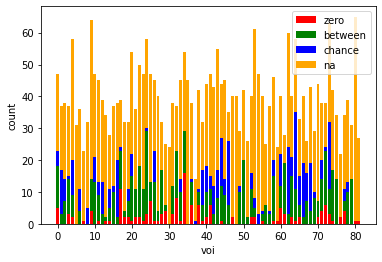

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('voi')
plt.ylabel('count')
plt.bar(np.arange(len(ZERO)), ZERO, color='r')
plt.bar(np.arange(len(BETWEEN)), BETWEEN, bottom=ZERO, color='g')
plt.bar(np.arange(len(CHANCE)), CHANCE, bottom=ZERO+BETWEEN, color='b')
plt.bar(np.arange(len(NA)), NA, bottom=ZERO+BETWEEN+CHANCE, color='orange')
plt.legend(['zero', 'between', 'chance', 'na'])

In [48]:
aa

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])